In [128]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [3]:
#cargo los datos de la educacion de los postulantes
nivelEd = pd.read_csv("../Data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
nivelEd["estado"].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

                   nombre
nombre                   
Doctorado             105
Master               1935
Otro                18882
Posgrado             4831
Secundario         103105
Terciario/Técnico   27009
Universitario       38607


Text(0.5,1,'Postulantes por nivel de educación completado')

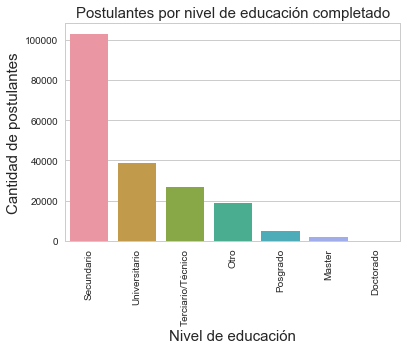

In [4]:
nivelEdCompletado = nivelEd[nivelEd["estado"] == "Graduado"]

#veamos la cantidad de postulantes por grado de educacion completado
cantidadPorEducacionCompletada = nivelEdCompletado.groupby("nombre").agg({"nombre":"count"})
print(cantidadPorEducacionCompletada)
graf = sns.countplot(x='nombre', data=nivelEdCompletado, order=nivelEdCompletado['nombre'].value_counts().index, orient='v')
graf.set_xticklabels(graf.get_xticklabels(),rotation=90)
graf.set_xlabel("Nivel de educación", fontsize=15)
graf.set_ylabel("Cantidad de postulantes", fontsize=15)
graf.set_title("Postulantes por nivel de educación completado", fontsize=15)

1    86475
3    33919
2    22246
4     4386
0     3304
5     1916
6      105
Name: gradoMax, dtype: int64


,idpostulante,gradoMax,nombre,nivelEd
0,0z5VvGv,1,Secundario,Secundario
1,0zB026d,2,Terciario/Técnico,Terciario/Técnico
2,0zB03O9,1,Secundario,Secundario
3,0zB08lq,1,Secundario,Secundario
4,0zB0NWY,3,Universitario,Universitario
5,0zB0Xwd,1,Secundario,Secundario
6,0zB0e1d,1,Secundario,Secundario
7,0zB0eDY,2,Terciario/Técnico,Terciario/Técnico
8,0zB0qGE,1,Secundario,Secundario
9,0zB10m8,3,Universitario,Universitario


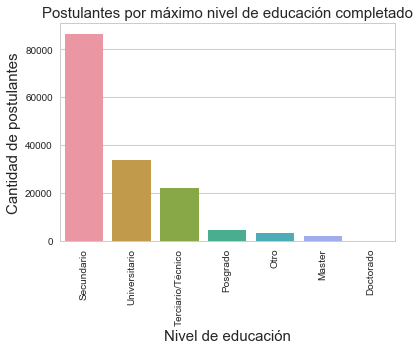

In [44]:
#Esto resulta logico ya que todos los que tienen completado un nivel superior tienen completado el secundario
#Generemos un dataframe con el grado maximo de educacion completada por id
mapGradoEc = {
    "Otro":0,
    "Terciario/Técnico": 2,
    "Secundario":1,
    "Posgrado": 4,
    "Universitario": 3,
    "Master": 5,
    "Doctorado": 6
}

def inverseDic(mapDic):
    newdic = {}
    for key in mapDic.keys():
        value = mapDic[key]
        newdic[value] = key
    return newdic
    
invDic = inverseDic(mapGradoEc)

nivelEd["gradoMax"] = nivelEd["nombre"].map(mapGradoEc)
nivelEdCompletado = nivelEd[nivelEd["estado"] == "Graduado"]


maxNivelEdCompletado = nivelEdCompletado.groupby("idpostulante").agg({"gradoMax":"max"})
print(maxNivelEdCompletado["gradoMax"].value_counts())
maxNivelEdCompletado["nombre"] = maxNivelEdCompletado["gradoMax"].map(invDic)

graf = sns.countplot(maxNivelEdCompletado["nombre"],order=maxNivelEdCompletado['nombre'].value_counts().index, orient='v')
graf.set_xticklabels(graf.get_xticklabels(),rotation=90)
graf.set_xlabel("Nivel de educación", fontsize=15)
graf.set_ylabel("Cantidad de postulantes", fontsize=15)
graf.set_title("Postulantes por máximo nivel de educación completado", fontsize=15)
maxNivelEdCompletado["nivelEd"] = maxNivelEdCompletado["nombre"]
maxNivelEdCompletado.drop("nombre", axis=1)
maxNivelEdCompletado.reset_index(level=0, inplace=True)
maxNivelEdCompletado

In [14]:
avisos = pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv")
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv")
anuncios.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Text(0.5,1,'Cantidad de avisos por area de trabajo')

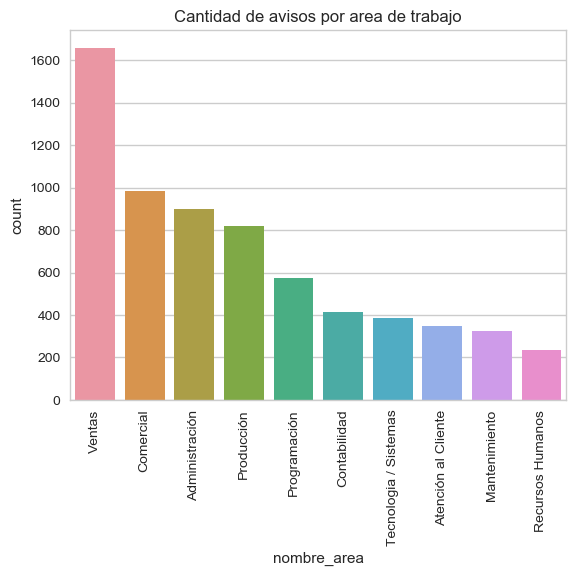

In [146]:
areaAvisos = avisos.loc[:,["idaviso","nombre_area"]]
#areaAvisos.sort_values
#print(areaAvisos.nombre_area.value_counts())
g = sns.countplot(x= "nombre_area",data = areaAvisos, order = areaAvisos.nombre_area.value_counts().head(10).index , orient='v')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Cantidad de avisos por area de trabajo")

In [132]:
postulaciones.head()
postulaciones = pd.merge(postulaciones,areaAvisos, how="left")
postulaciones = pd.merge(postulaciones,maxNivelEdCompletado, how="left")
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,nombre_area,gradoMax,nombre,nivelEd
0,1112257047,NM5M,2018-01-15 16:22:34,Atención al Cliente,1,Secundario,Secundario
1,1111920714,NM5M,2018-02-06 09:04:50,Telemarketing,1,Secundario,Secundario
2,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,1,Secundario,Secundario
3,1112345547,NM5M,2018-02-22 09:04:59,Telemarketing,1,Secundario,Secundario
4,1112237522,5awk,2018-01-25 18:55:03,Contabilidad,3,Universitario,Universitario


Text(0.5,1,'Cantidad de avisos por area de trabajo')

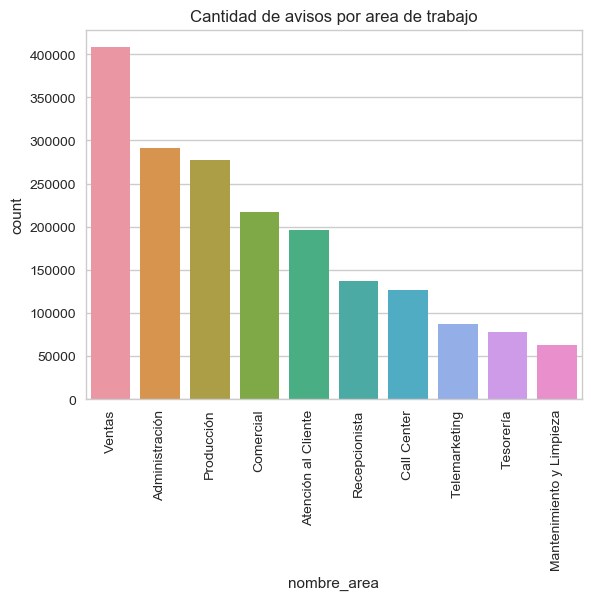

In [144]:
#veamos que areas son mas frecuentes para cada nivel educativo
#tomemos las 5 areas con mas postulaciones para cada nivel educativo
#postulaciones.groupby("nivelEd")["nombre_area"].value_counts().Universitario.head(5)
g = sns.countplot(x= "nombre_area",data = postulaciones, order = postulaciones.nombre_area.value_counts().head(10).index , orient='v')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Cantidad de avisos por area de trabajo")

['Secundario' 'Universitario' 'Terciario/Técnico' 'Master' nan 'Posgrado'
 'Otro' 'Doctorado']


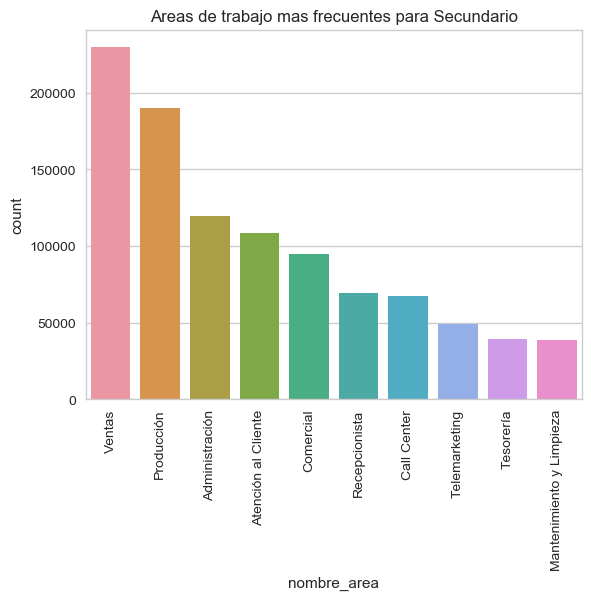

In [141]:
print(postulaciones.nivelEd.unique())

def graficarAreassPorNivelEd(nivel):
    #imprime las 10 areas mas frecuentes segun el nivel recibido por parametro
    postulacionesNivel = postulaciones[postulaciones["nivelEd"] == nivel]
    g = sns.countplot(x= "nombre_area",data = postulacionesNivel, order = postulacionesNivel.nombre_area.value_counts().head(10).index , orient='v')
    g.set_xticklabels(g.get_xticklabels(), rotation = 90)
    g.set_title("Areas de trabajo mas frecuentes para " + nivel)

graficarAreassPorNivelEd("Secundario")


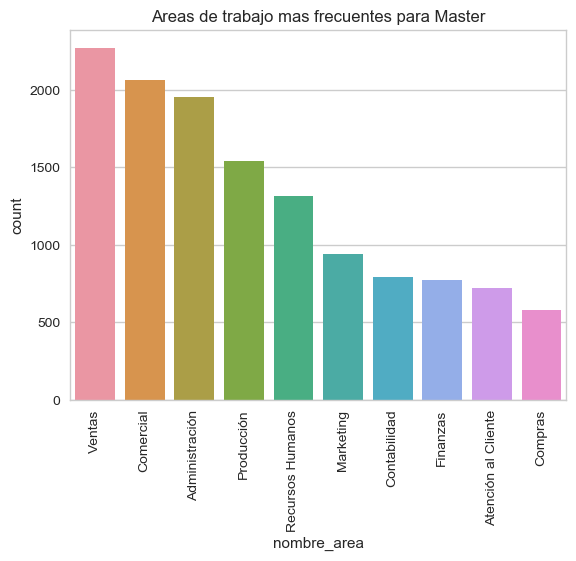

In [149]:
graficarAreassPorNivelEd("Master")

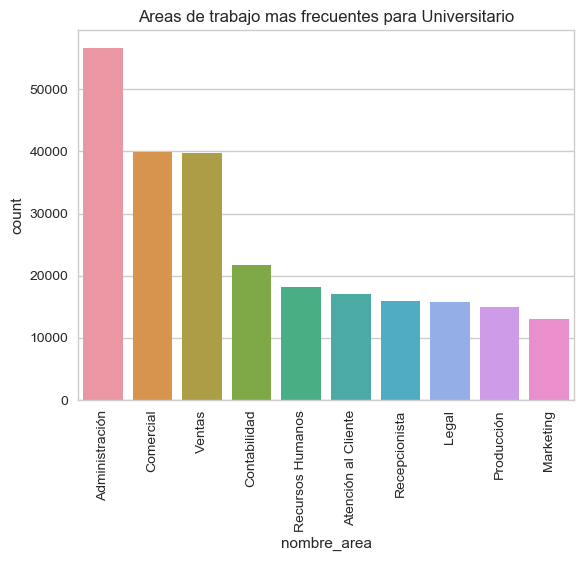

In [150]:

graficarAreassPorNivelEd("Universitario")


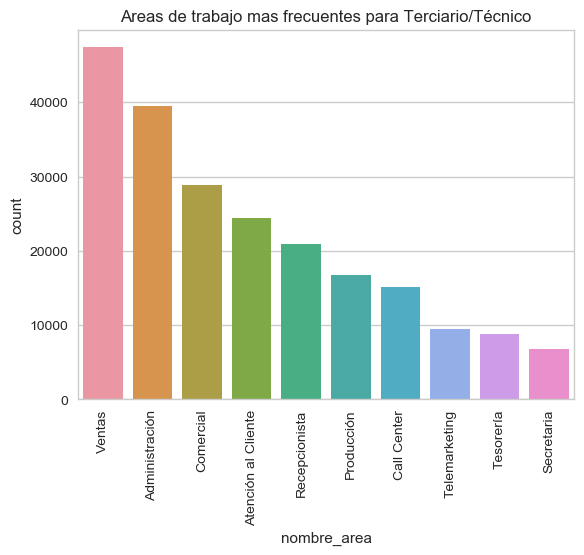

In [152]:

graficarAreassPorNivelEd("Terciario/Técnico")


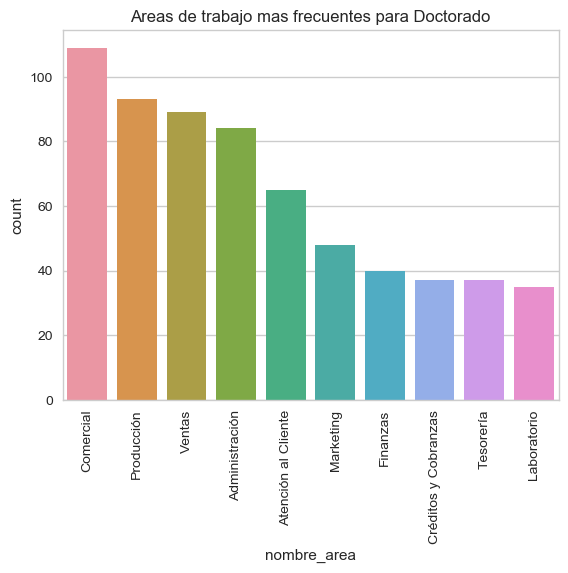

In [154]:

graficarAreassPorNivelEd("Doctorado")


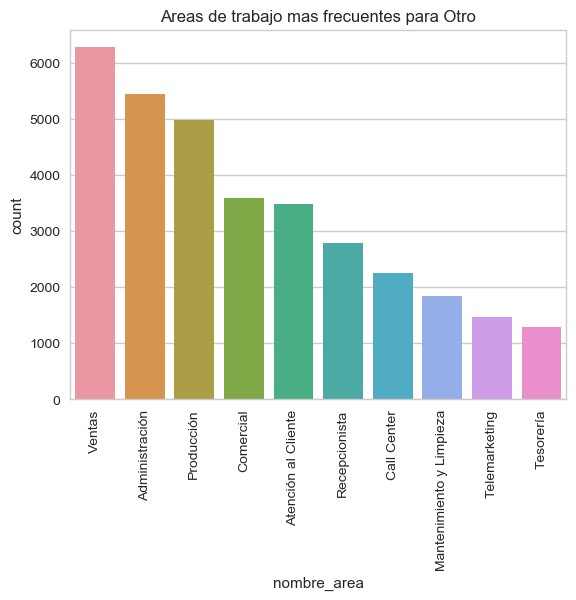

In [156]:

graficarAreassPorNivelEd("Otro")


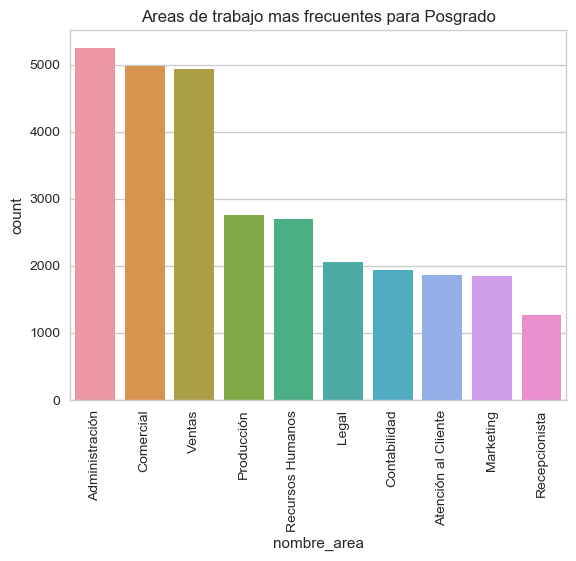

In [159]:

graficarAreassPorNivelEd("Posgrado")


In [167]:
#notamos que las areas de Administracion, comercial y ventas tienen postulaciones apmpliamnete mayores a las otras
#Veamos como es ahora el grafico sin ellas:

postulaciones = postulaciones[(postulaciones["nombre_area"] != "Administración") & (postulaciones["nombre_area"] != "Ventas")&(postulaciones["nombre_area"] != "Comercial") ]


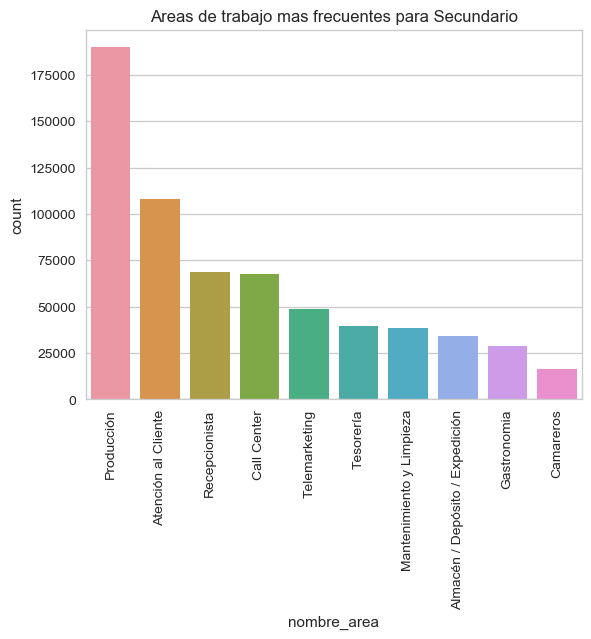

In [168]:
graficarAreassPorNivelEd("Secundario")


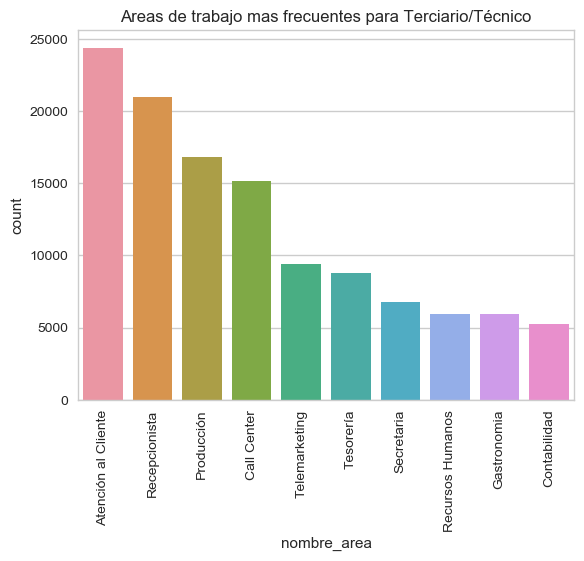

In [170]:
graficarAreassPorNivelEd("Terciario/Técnico")


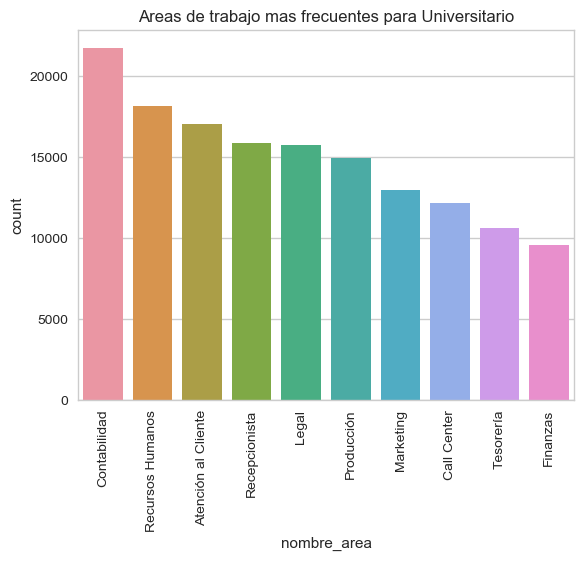

In [172]:
graficarAreassPorNivelEd("Universitario")


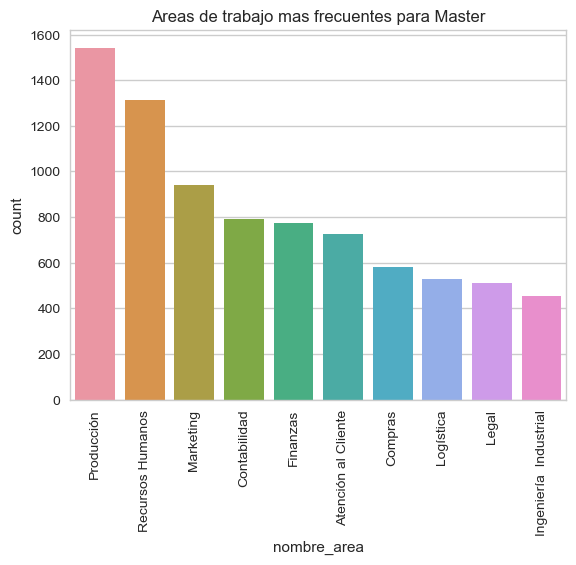

In [174]:
graficarAreassPorNivelEd("Master")


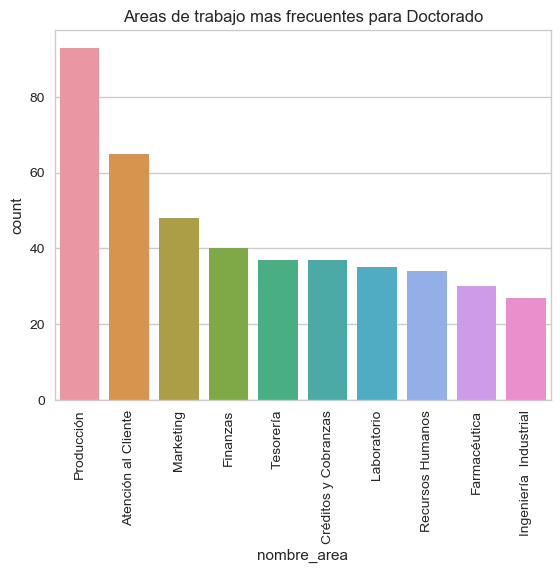

In [175]:
graficarAreassPorNivelEd("Doctorado")
